In [1]:
!ls ./data | sort

busstops_norway.csv
grunnkrets_age_distribution.csv
grunnkrets_households_num_persons.csv
grunnkrets_income_households.csv
grunnkrets_norway_stripped.csv
plaace_hierarchy.csv
sample_submission.csv
stores_extra.csv
stores_test.csv
stores_train.csv


## Libraries

In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Settings

In [49]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
plt.figure(figsize=(9, 7))
plt.style.use('bmh')

<Figure size 900x700 with 0 Axes>

## Import Files

In [11]:
stores_train = pd.read_csv('data/stores_train.csv')
stores_test = pd.read_csv('data/stores_test.csv')
stores_extra = pd.read_csv('data/stores_extra.csv')
plaace_hierarchy = pd.read_csv('data/plaace_hierarchy.csv')
grunnkrets = pd.read_csv('data/grunnkrets_norway_stripped.csv')
grunnkrets_ages = pd.read_csv('data/grunnkrets_age_distribution.csv')
grunnkrets_household_types = pd.read_csv('data/grunnkrets_households_num_persons.csv')
grunnkrets_household_income = pd.read_csv('data/grunnkrets_income_households.csv')
busstops = pd.read_csv('data/busstops_norway.csv')

## RMSLE Function

In [12]:
def rmsle(y_true, y_pred):
    """
    Computes the Root Mean Squared Logarithmic Error 
    
    Args:
        y_true (np.array): n-dimensional vector of ground-truth values 
        y_pred (np.array): n-dimensional vecotr of predicted values 
    
    Returns:
        A scalar float with the rmsle value 
    
    Note: You can alternatively use sklearn and just do: 
        `sklearn.metrics.mean_squared_log_error(y_true, y_pred) ** 0.5`
    """
    assert (y_true >= 0).all(), 'Received negative y_true values'
    assert (y_pred >= 0).all(), 'Received negative y_pred values'
    assert y_true.shape == y_pred.shape, 'y_true and y_pred have different shapes'
    y_true_log1p = np.log1p(y_true)  # log(1 + y_true)
    y_pred_log1p = np.log1p(y_pred)  # log(1 + y_pred)
    return np.sqrt(np.mean(np.square(y_pred_log1p - y_true_log1p)))

# Merging all the Datasets

## Merging plaace_hierarchy with Stores data

In [13]:
# Augment stores_train with information about the hierarchy
stores_with_hierarchy = stores_train.merge(plaace_hierarchy, how='left', on='plaace_hierarchy_id')
stores_with_hierarchy_test = stores_test.merge(plaace_hierarchy, how='left', on='plaace_hierarchy_id')

# Show dataframe, but transposed so that we can more easily see all the resulting columns
stores_with_hierarchy.head()

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name_x,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue,sales_channel_name_y,lv1,lv1_desc,lv2,lv2_desc,lv3,lv3_desc,lv4,lv4_desc
0,983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants
1,987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,NaN,23.828,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants
2,984890265-981157303-64491,2016,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,Kuben Hønefoss,16.099,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants
3,914057442-992924179-126912,2016,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,67.283669,14.379796,BURGER KING,Glasshuspassasjen,9.296,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants
4,913018583-913063538-668469,2016,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,16017414,NaN,63.358068,10.374832,BURGER KING,Tillertorget,4.528,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants


## Merging Grunnkrets with Stores data

In [14]:
grunnkrets_2016 = grunnkrets.loc[grunnkrets['year'] == 2016]
stores_with_hierarchy_grunnkrets = pd.merge(stores_with_hierarchy, grunnkrets_2016, how='left', on='grunnkrets_id')
stores_with_hierarchy_grunnkrets_test = pd.merge(stores_with_hierarchy_test, grunnkrets_2016, how='left', on='grunnkrets_id')
stores_with_hierarchy_grunnkrets_test


,store_id,year_x,store_name,plaace_hierarchy_id,sales_channel_name_x,grunnkrets_id,address,lat,lon,chain_name,mall_name,sales_channel_name_y,lv1,lv1_desc,lv2,lv2_desc,lv3,lv3_desc,lv4,lv4_desc,year_y,grunnkrets_name,district_name,municipality_name,geometry,area_km2
0,914206820-914239427-717245,2016,VÅLERENGA HALAL BURGER AS,1.1.1.0,Hamburger restaurants,3012704,STRØMSVEIEN 25 A,59.908672,10.787031,NaN,NaN,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Vålerenga rode 4,Vålerenga,Oslo,"POLYGON((10.7867135984557 59.908762574244, 10....",0.057027
1,916789157-916823770-824309,2016,BURGER KING MYREN,1.1.1.0,Hamburger restaurants,8061401,MYREN 1,59.201467,9.588243,BURGER KING,NaN,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Kjempa,Gulset,Skien,MULTIPOLYGON(((9.57990302232997 59.20175739826...,0.165993
2,913341082-977479363-2948,2016,BURGER KING STOVNER,1.1.1.0,Hamburger restaurants,3013917,STOVNER SENTER 3,59.962146,10.924524,BURGER KING,Stovner Senter,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Stovner senter,Fossum,Oslo,"POLYGON((10.9327714172545 59.9614144471754, 10...",0.236628
3,889682582-889697172-28720,2016,BURGER KING TUNGASLETTA,1.1.1.0,Hamburger restaurants,16012104,TUNGASLETTA 16,63.420785,10.461091,BURGER KING,NaN,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Strindheim 4,Strindheim,Trondheim,"POLYGON((10.459001199372 63.424320840557, 10.4...",0.983436
4,997991699-998006945-417222,2016,VULKAN BURGERBAR,1.1.1.0,Hamburger restaurants,3014305,AUD SCHØNEMANNS VEI 15,59.921102,10.785123,VULKAN BURGERBAR,NaN,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Lille Tøyen,Hasle,Oslo,"POLYGON((10.7815720596407 59.9175770831722, 10...",0.449502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8572,917323003-917383529-844309,2016,GULATING HAUGESUND,2.8.11.2,Beer and soda shop,11490601,BRÅTAVEGEN 30,59.259575,5.325813,GULATING GRUPPEN,NaN,Beer and soda shop,2,Retail,2.8,Food and drinks,2.8.11,Alcohol sales,2.8.11.2,Beer and soda shop,2016.0,Stokkastrand,Kopervik,Karmøy,MULTIPOLYGON(((5.32136787489711 59.23099432230...,1.708924
8573,917353379-917411824-845904,2016,STAVANGER BEER AS,2.8.11.2,Beer and soda shop,11030901,SANDVIGÅ 7,58.976219,5.721546,NaN,NaN,Beer and soda shop,2,Retail,2.8,Food and drinks,2.8.11,Alcohol sales,2.8.11.2,Beer and soda shop,2016.0,Bjergsted,Kampen,Stavanger,"POLYGON((5.72714116927016 58.9724047824004, 5....",0.310575
8574,917072302-917089248-833647,2016,GULATING ØLUTSALG OG PUB,2.8.11.2,Beer and soda shop,2270103,GARDERBAKKEN 6,59.928330,11.163202,GULATING GRUPPEN,NaN,Beer and soda shop,2,Retail,2.8,Food and drinks,2.8.11,Alcohol sales,2.8.11.2,Beer and soda shop,2016.0,Fetsund,Hovinhøgda,Fet,"POLYGON((11.1631232250592 59.9379356074191, 11...",1.627789
8575,916960557-916993161-829908,2016,VI BRYGGER BUTIKKDRIFT AS,2.8.11.2,Beer and soda shop,12470701,RAVNANGERVEGEN,60.445790,5.161587,NaN,NaN,Beer and soda shop,2,Retail,2.8,Food and drinks,2.8.11,Alcohol sales,2.8.11.2,Beer and soda shop,2016.0,Haugland,Haugland/Davanger/Ramsøy,Askøy,MULTIPOLYGON(((5.18520140772538 60.44242290291...,1.103012


In [15]:
grunnkrets_ages
grunnkrets_ages_2016 = grunnkrets_ages.loc[grunnkrets_ages['year'] == 2016]
stores_with_hierarchy_grunnkrets_age = pd.merge(stores_with_hierarchy_grunnkrets, grunnkrets_ages_2016, how='left', on='grunnkrets_id')
stores_with_hierarchy_grunnkrets_age_test = pd.merge(stores_with_hierarchy_grunnkrets_test, grunnkrets_ages_2016, how='left', on='grunnkrets_id')
stores_with_hierarchy_grunnkrets_age


,store_id,year_x,store_name,plaace_hierarchy_id,sales_channel_name_x,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue,sales_channel_name_y,lv1,lv1_desc,lv2,lv2_desc,lv3,lv3_desc,lv4,lv4_desc,year_y,grunnkrets_name,district_name,municipality_name,geometry,area_km2,year,age_0,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,age_9,age_10,age_11,age_12,age_13,age_14,age_15,age_16,age_17,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,age_28,age_29,age_30,age_31,age_32,age_33,age_34,age_35,age_36,age_37,age_38,age_39,age_40,age_41,age_42,age_43,age_44,age_45,age_46,age_47,age_48,age_49,age_50,age_51,age_52,age_53,age_54,age_55,age_56,age_57,age_58,age_59,age_60,age_61,age_62,age_63,age_64,age_65,age_66,age_67,age_68,age_69,age_70,age_71,age_72,age_73,age_74,age_75,age_76,age_77,age_78,age_79,age_80,age_81,age_82,age_83,age_84,age_85,age_86,age_87,age_88,age_89,age_90
0,983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Bragernes sentrum 3,Bragernes sentrum,Drammen,"POLYGON((10.2046156903846 59.7447808519649, 10...",0.155779,2016.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,NaN,23.828,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Sentrum 3 /rode 6,Sentrum 3,Oslo,"POLYGON((10.7303654475615 59.9107195782207, 10...",0.264278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,984890265-981157303-64491,2016,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,Kuben Hønefoss,16.099,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Sydsiden 2,Hønefoss,Ringerike,"POLYGON((10.2654039198422 60.1639238060368, 10...",0.160152,2016.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,3.0,3.0,5.0,6.0,7.0,8.0,9.0,10.0,10.0,10.0,10.0,10.0,9.0,9.0,8.0,8.0,7.0,7.0,6.0,6.0,5.0,5.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,914057442-992924179-126912,2016,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,67.283669,14.379796,BURGER KING,Glasshuspassasjen,9.296,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Sentrum 1,Sentrum,Bodø,"POLYGON((14.3800126797167 67.2852351710009, 14...",0.095029,2016.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,4.0,6.0,8.0,9.0,10.0,10.0,11.0,11.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,9.0,9.0,9.0,8.0,8.0,8.0,7.0,7.0,7.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,6.0,6.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,913018583-913063538-668469,2016,BURGER KING TILLER

In [98]:
grunnkrets_household_types
grunnkrets_household_types_2016 = grunnkrets_household_types.loc[grunnkrets_household_types['year'] == 2016]
stores_with_hierarchy_grunnkrets_age_hhtypes = pd.merge(stores_with_hierarchy_grunnkrets_age, grunnkrets_household_types_2016, how='left', on='grunnkrets_id')
stores_with_hierarchy_grunnkrets_age_hhtypes_test = pd.merge(stores_with_hierarchy_grunnkrets_age_test, grunnkrets_household_types_2016, how='left', on='grunnkrets_id')

stores_with_hierarchy_grunnkrets_age_hhtypes


/tmp/ipykernel_611458/2204752244.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'year_x'} in the result is deprecated and will raise a MergeError in a future version.
  stores_with_hierarchy_grunnkrets_age_hhtypes = pd.merge(stores_with_hierarchy_grunnkrets_age, grunnkrets_household_types_2016, how='left', on='grunnkrets_id')
/tmp/ipykernel_611458/2204752244.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'year_x'} in the result is deprecated and will raise a MergeError in a future version.
  stores_with_hierarchy_grunnkrets_age_hhtypes_test = pd.merge(stores_with_hierarchy_grunnkrets_age_test, grunnkrets_household_types_2016, how='left', on='grunnkrets_id')


,store_id,year_x,store_name,plaace_hierarchy_id,sales_channel_name_x,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue,sales_channel_name_y,lv1,lv1_desc,lv2,lv2_desc,lv3,lv3_desc,lv4,lv4_desc,year_y,grunnkrets_name,district_name,municipality_name,geometry,area_km2,year_x,age_0,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,age_9,age_10,age_11,age_12,age_13,age_14,age_15,age_16,age_17,age_18,age_19,age_20,age_21,...,age_50,age_51,age_52,age_53,age_54,age_55,age_56,age_57,age_58,age_59,age_60,age_61,age_62,age_63,age_64,age_65,age_66,age_67,age_68,age_69,age_70,age_71,age_72,age_73,age_74,age_75,age_76,age_77,age_78,age_79,age_80,age_81,age_82,age_83,age_84,age_85,age_86,age_87,age_88,age_89,age_90,year_y,couple_children_0_to_5_years,couple_children_18_or_above,couple_children_6_to_17_years,couple_without_children,single_parent_children_0_to_5_years,single_parent_children_18_or_above,single_parent_children_6_to_17_years,singles
0,983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Bragernes sentrum 3,Bragernes sentrum,Drammen,"POLYGON((10.2046156903846 59.7447808519649, 10...",0.155779,2016.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,4.0,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016.0,20.0,0.0,8.0,28.0,4.0,6.0,11.0,75.0
1,987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,NaN,23.828,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Sentrum 3 /rode 6,Sentrum 3,Oslo,"POLYGON((10.7303654475615 59.9107195782207, 10...",0.264278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2,984890265-981157303-64491,2016,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,Kuben Hønefoss,16.099,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Sydsiden 2,Hønefoss,Ringerike,"POLYGON((10.2654039198422 60.1639238060368, 10...",0.160152,2016.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,3.0,3.0,5.0,6.0,7.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2016.0,45.0,9.0,38.0,84.0,13.0,6.0,12.0,150.0
3,914057442-992924179-126912,2016,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,67.283669,14.379796,BURGER KING,Glasshuspassasjen,9.296,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Sentrum 1,Sentrum,Bodø,"POLYGON((14.3800126797167 67.2852351710009, 14...",0.095029,2016.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,4.0,6.0,8.0,...,6.0,5.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,6.0,6.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2016.0,41.0,10.0,27.0,126.0,11.0,8.0,15.0,254.0
4,913018583-913063538-668469,2016,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,16017414,NaN,63.358068,10.374832,BURGER KING,Tillertorget,4.528,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Til

In [121]:
grunnkrets_household_income
grunnkrets_household_income_2016 = grunnkrets_household_income.loc[grunnkrets_household_income['year'] == 2016]
stores_with_hierarchy_grunnkrets_age_hhtypes_hhincome = pd.merge(stores_with_hierarchy_grunnkrets_age_hhtypes, grunnkrets_household_income_2016, how='left', on='grunnkrets_id')
stores_with_hierarchy_grunnkrets_age_hhtypes_hhincome_test = pd.merge(stores_with_hierarchy_grunnkrets_age_hhtypes_test, grunnkrets_household_income_2016, how='left', on='grunnkrets_id')

stores_with_hierarchy_grunnkrets_age_hhtypes_hhincome


,store_id,year_x,store_name,plaace_hierarchy_id,sales_channel_name_x,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue,sales_channel_name_y,lv1,lv1_desc,lv2,lv2_desc,lv3,lv3_desc,lv4,lv4_desc,year_y,grunnkrets_name,district_name,municipality_name,geometry,area_km2,year_x,age_0,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,age_9,age_10,age_11,age_12,age_13,age_14,age_15,age_16,age_17,age_18,age_19,age_20,age_21,...,age_57,age_58,age_59,age_60,age_61,age_62,age_63,age_64,age_65,age_66,age_67,age_68,age_69,age_70,age_71,age_72,age_73,age_74,age_75,age_76,age_77,age_78,age_79,age_80,age_81,age_82,age_83,age_84,age_85,age_86,age_87,age_88,age_89,age_90,year_y,couple_children_0_to_5_years,couple_children_18_or_above,couple_children_6_to_17_years,couple_without_children_x,single_parent_children_0_to_5_years,single_parent_children_18_or_above,single_parent_children_6_to_17_years,singles_x,year,all_households,singles_y,couple_without_children_y,couple_with_children,other_households,single_parent_with_children
0,983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Bragernes sentrum 3,Bragernes sentrum,Drammen,"POLYGON((10.2046156903846 59.7447808519649, 10...",0.155779,2016.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,4.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016.0,20.0,0.0,8.0,28.0,4.0,6.0,11.0,75.0,2016.0,398700.0,277500.0,669100.0,832800.0,679600.0,349500.0
1,987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,NaN,23.828,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Sentrum 3 /rode 6,Sentrum 3,Oslo,"POLYGON((10.7303654475615 59.9107195782207, 10...",0.264278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2016.0,374800.0,295000.0,679600.0,802200.0,604100.0,397700.0
2,984890265-981157303-64491,2016,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,Kuben Hønefoss,16.099,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Sydsiden 2,Hønefoss,Ringerike,"POLYGON((10.2654039198422 60.1639238060368, 10...",0.160152,2016.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,3.0,3.0,5.0,6.0,7.0,...,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2016.0,45.0,9.0,38.0,84.0,13.0,6.0,12.0,150.0,2016.0,347900.0,251900.0,589900.0,673100.0,637600.0,327000.0
3,914057442-992924179-126912,2016,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,67.283669,14.379796,BURGER KING,Glasshuspassasjen,9.296,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Sentrum 1,Sentrum,Bodø,"POLYGON((14.3800126797167 67.2852351710009, 14...",0.095029,2016.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,4.0,6.0,8.0,...,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,6.0,6.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2016.0,41.0,10.0,27.0,126.0,11.0,8.0,15.0,254.0,2016.0,394000.0,293600.0,602000.0,675800.0,699600.0,335200.0
4,913018583-913063538-668469,2016,BURGER KING TILLERTORGET,1.1.1.0,Hamburg

In [123]:
stores_train_merged = stores_with_hierarchy_grunnkrets_age_hhtypes_hhincome
stores_test_merged = stores_with_hierarchy_grunnkrets_age_hhtypes_hhincome_test
stores_train_merged

,store_id,year_x,store_name,plaace_hierarchy_id,sales_channel_name_x,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue,sales_channel_name_y,lv1,lv1_desc,lv2,lv2_desc,lv3,lv3_desc,lv4,lv4_desc,year_y,grunnkrets_name,district_name,municipality_name,geometry,area_km2,year_x,age_0,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,age_9,age_10,age_11,age_12,age_13,age_14,age_15,age_16,age_17,age_18,age_19,age_20,age_21,...,age_57,age_58,age_59,age_60,age_61,age_62,age_63,age_64,age_65,age_66,age_67,age_68,age_69,age_70,age_71,age_72,age_73,age_74,age_75,age_76,age_77,age_78,age_79,age_80,age_81,age_82,age_83,age_84,age_85,age_86,age_87,age_88,age_89,age_90,year_y,couple_children_0_to_5_years,couple_children_18_or_above,couple_children_6_to_17_years,couple_without_children_x,single_parent_children_0_to_5_years,single_parent_children_18_or_above,single_parent_children_6_to_17_years,singles_x,year,all_households,singles_y,couple_without_children_y,couple_with_children,other_households,single_parent_with_children
0,983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Bragernes sentrum 3,Bragernes sentrum,Drammen,"POLYGON((10.2046156903846 59.7447808519649, 10...",0.155779,2016.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,4.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016.0,20.0,0.0,8.0,28.0,4.0,6.0,11.0,75.0,2016.0,398700.0,277500.0,669100.0,832800.0,679600.0,349500.0
1,987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,NaN,23.828,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Sentrum 3 /rode 6,Sentrum 3,Oslo,"POLYGON((10.7303654475615 59.9107195782207, 10...",0.264278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2016.0,374800.0,295000.0,679600.0,802200.0,604100.0,397700.0
2,984890265-981157303-64491,2016,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,Kuben Hønefoss,16.099,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Sydsiden 2,Hønefoss,Ringerike,"POLYGON((10.2654039198422 60.1639238060368, 10...",0.160152,2016.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,3.0,3.0,5.0,6.0,7.0,...,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2016.0,45.0,9.0,38.0,84.0,13.0,6.0,12.0,150.0,2016.0,347900.0,251900.0,589900.0,673100.0,637600.0,327000.0
3,914057442-992924179-126912,2016,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,67.283669,14.379796,BURGER KING,Glasshuspassasjen,9.296,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants,2016.0,Sentrum 1,Sentrum,Bodø,"POLYGON((14.3800126797167 67.2852351710009, 14...",0.095029,2016.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,4.0,6.0,8.0,...,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,6.0,6.0,5.0,5.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2016.0,41.0,10.0,27.0,126.0,11.0,8.0,15.0,254.0,2016.0,394000.0,293600.0,602000.0,675800.0,699600.0,335200.0
4,913018583-913063538-668469,2016,BURGER KING TILLERTORGET,1.1.1.0,Hamburg

# Exploratory Data Analysis

In [124]:
df = stores_train_merged

In [125]:
s = df.pop('revenue')
new_df = pd.concat([df, s], 1)


/tmp/ipykernel_611458/3252147721.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  new_df = pd.concat([df, s], 1)


### Seperate the data set into numerical and categorical data

In [127]:
df_numerical_features = new_df.select_dtypes(exclude='object')
df_categorical_features = new_df.select_dtypes(include='object')

In [128]:
df = new_df

## Distribution of Revenue

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


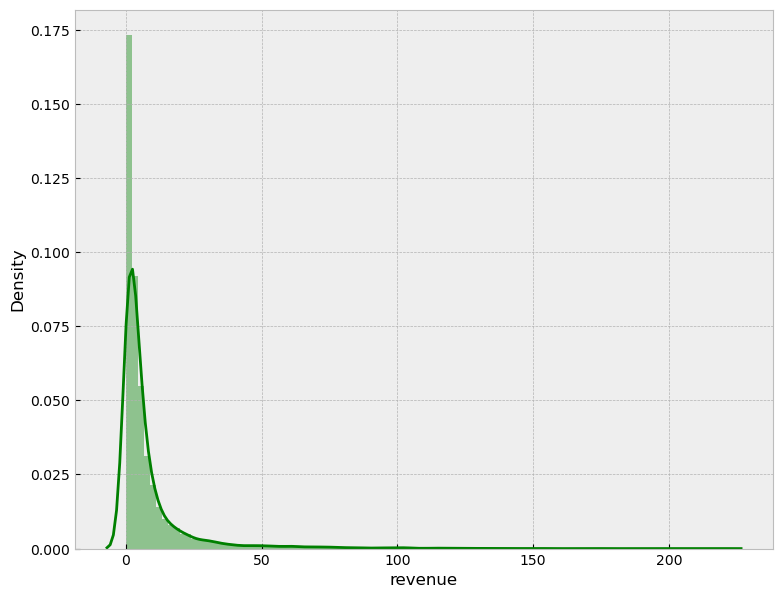

In [129]:
plt.figure(figsize=(9, 7))
sns.distplot(df['revenue'], color='g', bins=100, hist_kws={'alpha': 0.4});

## Numerical Data Distribution

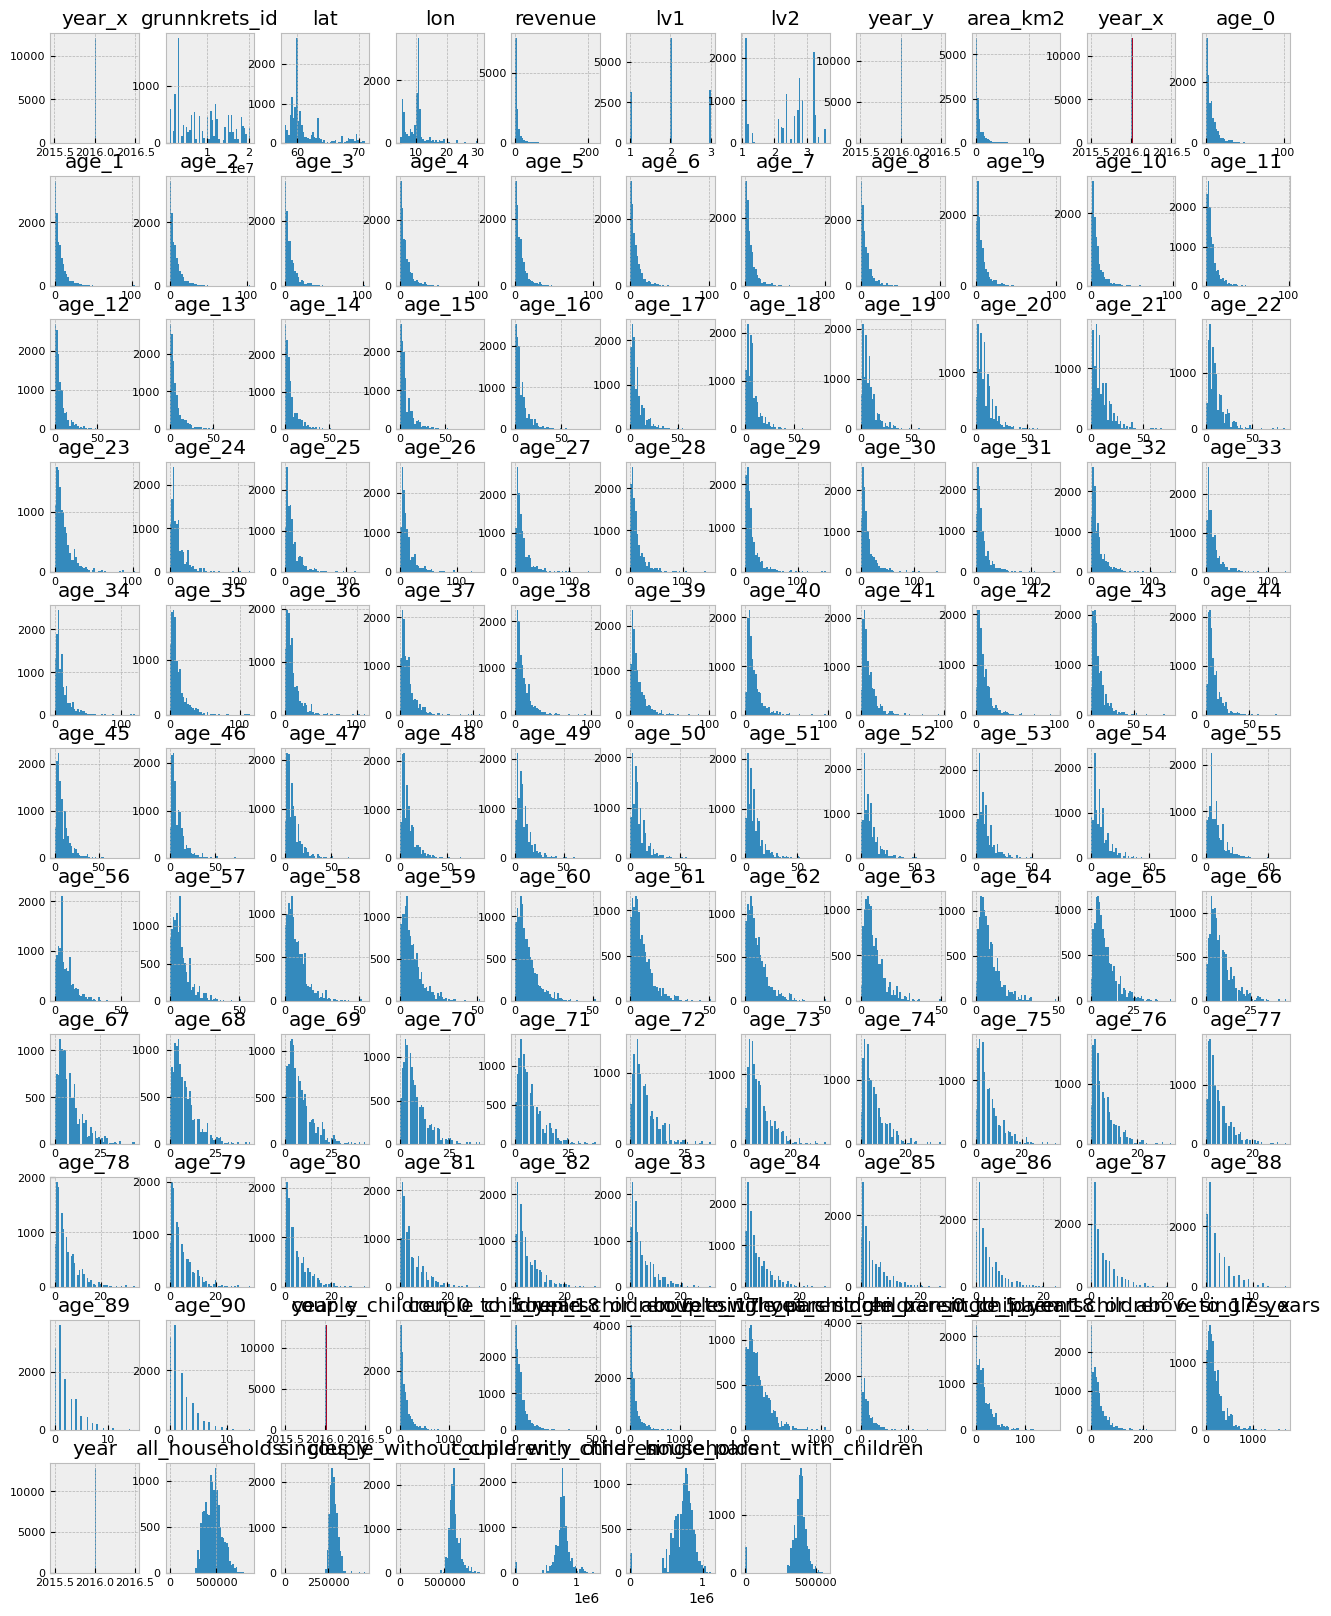

In [51]:
df_numerical_features.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

## Correlation with Revenue

In [136]:
df_num_corr = df_numerical_features.corr()['revenue'][:-1] # -1 because the latest row is SalePrice
df_num_corr
golden_features_list = df_num_corr[abs(df_num_corr) > 0.02].sort_values(ascending=False)
print("The top {} correlated values with revenue are:\n{}".format(len(golden_features_list), golden_features_list))

The top 17 correlated values with revenue are:
all_households                 0.037117
singles_y                      0.034573
age_15                         0.024517
age_16                         0.024286
age_14                         0.024234
age_17                         0.023817
age_13                         0.023262
age_12                         0.023047
single_parent_with_children    0.022381
age_18                         0.022195
age_11                         0.022174
lv2                            0.021941
age_10                         0.021011
other_households               0.020773
age_9                          0.020456
age_8                          0.020084
lv1                           -0.068732
Name: revenue, dtype: float64


# Feature Engineering

## 1. Dropping Redundant Columns

In [19]:
stores_train_finalcols = stores_train_merged.drop(columns=[
    'year_x', 'store_name', 'plaace_hierarchy_id', 'grunnkrets_id', 'address', 'lv1', 'lv2', 'lv3', 'lv4', 'year_y',
    'grunnkrets_name', 'district_name', 'geometry'])

stores_test_finalcols = stores_test_merged.drop(columns=[
    'year_x', 'store_name', 'plaace_hierarchy_id', 'grunnkrets_id', 'address', 'lv1', 'lv2', 'lv3', 'lv4', 'year_y',
    'grunnkrets_name', 'district_name', 'geometry'])

In [29]:
stores_train_finalcols.dtypes

store_id                        object
sales_channel_name_x            object
lat                            float64
lon                            float64
chain_name                      object
                                ...   
singles_y                      float64
couple_without_children_y      float64
couple_with_children           float64
other_households               float64
single_parent_with_children    float64
Length: 120, dtype: object

## 2. One Hot Encoding

In [21]:
#categorical data
categorical_cols = ['sales_channel_name_x', 'chain_name', 'mall_name', 'sales_channel_name_y', 'lv1_desc',
'lv2_desc', 'lv3_desc', 'lv4_desc', 'municipality_name'] 

df_res = stores_train_finalcols.append(stores_test_finalcols)

#import pandas as pd
df_res_onehot = pd.get_dummies(df_res, columns = categorical_cols)
stores_train_finalcols_onehot = df_res_onehot.iloc[:12859]
stores_test_finalcols_onehot = df_res_onehot.iloc[12859:]


X_train = stores_train_finalcols_onehot.drop(columns=['revenue', 'store_id'])
y_train = stores_train_finalcols_onehot.revenue 
stores_test_finalcols_onehot
X_test = stores_test_finalcols_onehot.drop(columns=['store_id','revenue'])


## 3. Handling Outliers

# Models

## Model 1 - catBoost

In [22]:
import catboost as ctb

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.16.0-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [28]:
best_params = {
            'bagging_temperature': 0.5,
            'depth': 8,
            'iterations': 1000,
            'l2_leaf_reg': 25,
            'learning_rate': 0.05,
            'sampling_frequency': 'PerTreeLevel',
            'leaf_estimation_method': 'Gradient',
            'random_strength': 0.8,
            'boosting_type': 'Ordered',
            'feature_border_type': 'MaxLogSum',
            'l2_leaf_reg': 50,
            'max_ctr_complexity': 2,
            'fold_len_multiplier': 2
    }
model = ctb.CatBoostRegressor(**best_params,
                               loss_function='RMSE',
                               eval_metric='AUC',
                               nan_mode='Min',
                               thread_count=8,
                               task_type='CPU',
                               verbose=True)
model.fit(X_train, y_train)

TBB Warning: The number of workers is currently limited to 3. The request for 7 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.



0:	total: 121ms	remaining: 2m
1:	total: 209ms	remaining: 1m 44s
2:	total: 295ms	remaining: 1m 37s
3:	total: 380ms	remaining: 1m 34s
4:	total: 467ms	remaining: 1m 32s
5:	total: 552ms	remaining: 1m 31s
6:	total: 637ms	remaining: 1m 30s
7:	total: 722ms	remaining: 1m 29s
8:	total: 805ms	remaining: 1m 28s
9:	total: 834ms	remaining: 1m 22s
10:	total: 923ms	remaining: 1m 22s
11:	total: 973ms	remaining: 1m 20s
12:	total: 1.06s	remaining: 1m 20s
13:	total: 1.15s	remaining: 1m 20s
14:	total: 1.24s	remaining: 1m 21s
15:	total: 1.32s	remaining: 1m 21s
16:	total: 1.35s	remaining: 1m 18s
17:	total: 1.44s	remaining: 1m 18s
18:	total: 1.49s	remaining: 1m 16s
19:	total: 1.5s	remaining: 1m 13s
20:	total: 1.59s	remaining: 1m 14s
21:	total: 1.67s	remaining: 1m 14s
22:	total: 1.76s	remaining: 1m 14s
23:	total: 1.84s	remaining: 1m 14s
24:	total: 1.93s	remaining: 1m 15s
25:	total: 2.02s	remaining: 1m 15s
26:	total: 2.1s	remaining: 1m 15s
27:	total: 2.19s	remaining: 1m 15s
28:	total: 2.27s	remaining: 1m 16s
2

### Parameter Tuning Using GridSearch

In [23]:
from sklearn.model_selection import GridSearchCV

train_dataset = ctb.Pool(X_train, y_train) 
model = ctb.CatBoostRegressor()

#create the grid
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

0:	learn: 17.2045417	test: 16.9729109	best: 16.9729109 (0)	total: 48.7ms	remaining: 4.83s
1:	learn: 16.9445785	test: 16.7155121	best: 16.7155121 (1)	total: 51.8ms	remaining: 2.54s
2:	learn: 16.6926889	test: 16.4495987	best: 16.4495987 (2)	total: 54.9ms	remaining: 1.77s
3:	learn: 16.4521553	test: 16.1958334	best: 16.1958334 (3)	total: 56.8ms	remaining: 1.36s
4:	learn: 16.2225719	test: 15.9537930	best: 15.9537930 (4)	total: 58.7ms	remaining: 1.11s
5:	learn: 16.0035411	test: 15.7230617	best: 15.7230617 (5)	total: 60.5ms	remaining: 949ms
6:	learn: 15.7946733	test: 15.5032316	best: 15.5032316 (6)	total: 62.3ms	remaining: 828ms
7:	learn: 15.5955877	test: 15.2939022	best: 15.2939022 (7)	total: 64ms	remaining: 736ms
8:	learn: 15.4059115	test: 15.0946811	best: 15.0946811 (8)	total: 65.7ms	remaining: 664ms
9:	learn: 15.2252804	test: 14.9051835	best: 14.9051835 (9)	total: 67.3ms	remaining: 606ms
10:	learn: 15.0533388	test: 14.7250327	best: 14.7250327 (10)	total: 68.9ms	remaining: 558ms
11:	learn:

{'params': {'depth': 6,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [24]:
y_train_pred = model.predict(X_train)
y_train_pred[y_train_pred<0] = 0
y_train_pred

array([ 8.30546813, 10.77614132,  5.04391818, ...,  4.72167774,
        3.86942706,  4.62526943])

In [25]:
print(f'Train set RMSLE: {rmsle(y_train, y_train_pred) :.4f}')


Train set RMSLE: 0.8253


In [26]:
X_test = stores_test_finalcols_onehot.drop(columns=['store_id', 'revenue'])
stores_test_finalcols_onehot
y_test_pred = model.predict(X_test)

In [27]:
submission = pd.DataFrame()
submission['id'] = stores_test_finalcols_onehot.store_id 
submission['predicted'] = np.asarray(y_test_pred)

# Save it to disk (`index=False` means don't save the index in the csv)
submission.to_csv('submission_5.csv', index=False)
submission

,id,predicted
0,914206820-914239427-717245,5.400062
1,916789157-916823770-824309,6.525629
2,913341082-977479363-2948,3.089028
3,889682582-889697172-28720,5.520484
4,997991699-998006945-417222,4.715275
...,...,...
8572,917323003-917383529-844309,3.643643
8573,917353379-917411824-845904,5.109950
8574,917072302-917089248-833647,4.713914
8575,916960557-916993161-829908,11.288998


## Model 2 - XGBoost

In [141]:
import xgboost as xg

In [142]:
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
  
# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
pred = xgb_r.predict(X_test)

[15:17:17] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [143]:
submission = pd.DataFrame()
submission['id'] = stores_test_finalcols_onehot.store_id 
submission['predicted'] = np.asarray(pred)

# Save it to disk (`index=False` means don't save the index in the csv)
submission.to_csv('submission_6.csv', index=False)
submission

,id,predicted
0,914206820-914239427-717245,5.342290
1,916789157-916823770-824309,6.518227
2,913341082-977479363-2948,5.342290
3,889682582-889697172-28720,5.342290
4,997991699-998006945-417222,5.342290
...,...,...
8572,917323003-917383529-844309,5.342290
8573,917353379-917411824-845904,5.342290
8574,917072302-917089248-833647,5.342290
8575,916960557-916993161-829908,5.342290


## Model 3 - LightGBM

In [144]:
import lightgbm as lgb

In [145]:
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}
 

In [146]:
lgb_train = lgb.Dataset(X_train, y_train)

In [147]:
# fitting the model
model = lgb.train(params,
                 train_set=lgb_train)

[LightGBM] [Warning] Unknown parameter: learnnig_rage


In [148]:
y_pred = model.predict(X_test)

In [149]:
submission = pd.DataFrame()
submission['id'] = stores_test_finalcols_onehot.store_id 
submission['predicted'] = np.asarray(y_pred)

# Save it to disk (`index=False` means don't save the index in the csv)
submission.to_csv('submission_7.csv', index=False)
submission

,id,predicted
0,914206820-914239427-717245,7.811223
1,916789157-916823770-824309,8.195462
2,913341082-977479363-2948,4.896397
3,889682582-889697172-28720,8.558425
4,997991699-998006945-417222,6.311818
...,...,...
8572,917323003-917383529-844309,4.323068
8573,917353379-917411824-845904,5.987555
8574,917072302-917089248-833647,5.251711
8575,916960557-916993161-829908,4.862796
